### Visualisation of outlier classification

In [1]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
%store -r  X_test_labeled_df

In [3]:
save_plots = True

In [4]:
X_test_labeled_df.head()

,Analysis,Li7,Nd146,Pr141,Ba137,Sr88,Rb85,Ge72,Cu63,Fe56,Cr52,V51,Zr90,Sc45,B11,Mg24,Al27,P31,S33,U238,La139,Ga69,Y89,K39,Ce140,Cd111,Zn68,Ni60,Nb93,Si28,Mn55,inlierLabel
0,06_DH1_1,2.79,0.34,0.07,5.95,2.00,0.720000,1.37,11.14,35.38,5.18,0.51,1.43,1.08,93.21,27.83,635.240000,35.07,806.55,0.309799,0.18,0.69,0.21,443.100000,0.57,0.207143,20.75,1.03,0.222487,465388.29,3.27,1
1,07_DH1_2,2.37,0.24,0.06,7.51,1.84,0.770000,1.93,8.64,49.23,5.43,0.60,1.47,1.09,95.19,27.99,639.090000,31.65,807.55,0.309799,0.19,0.86,0.21,442.100000,0.53,0.207143,18.15,1.22,0.222487,465388.40,2.30,1
2,08_DH1_3,2.46,0.08,0.03,4.40,1.93,0.710000,2.14,3.44,16.46,2.61,0.62,1.16,1.17,93.63,26.43,670.480000,25.43,837.73,0.309799,0.11,0.79,0.13,444.280000,0.20,0.207143,17.54,1.01,0.222487,465378.49,1.40,1
3,09_DH2_1,18.47,0.25,0.06,12.48,4.29,1.620000,1.59,1.10,16.76,2.87,1.52,1.45,1.19,63.80,31.98,620.082431,24.63,750.62,0.080000,0.23,0.75,0.20,383.119348,0.40,0.220000,14.33,1.07,0.250000,464555.55,1.09,1
4,10_DH2_2,19.98,0.51,0.12,14.40,4.44,0.735373,0.81,1.23,62.16,5.92,2.44,1.99,1.22,60.96,44.95,620.082431,22.59,796.21,0.090000,0.48,0.76,0.27,383.119348,0.80,0.090000,14.59,0.93,0.680000,464137.82,1.26,1


## data preproccessing for dimensionality reduction and visualisation

In [5]:
element_data = X_test_labeled_df[X_test_labeled_df.columns.values[1:-1]]
element_data.head()

,Li7,Nd146,Pr141,Ba137,Sr88,Rb85,Ge72,Cu63,Fe56,Cr52,V51,Zr90,Sc45,B11,Mg24,Al27,P31,S33,U238,La139,Ga69,Y89,K39,Ce140,Cd111,Zn68,Ni60,Nb93,Si28,Mn55
0,2.79,0.34,0.07,5.95,2.00,0.720000,1.37,11.14,35.38,5.18,0.51,1.43,1.08,93.21,27.83,635.240000,35.07,806.55,0.309799,0.18,0.69,0.21,443.100000,0.57,0.207143,20.75,1.03,0.222487,465388.29,3.27
1,2.37,0.24,0.06,7.51,1.84,0.770000,1.93,8.64,49.23,5.43,0.60,1.47,1.09,95.19,27.99,639.090000,31.65,807.55,0.309799,0.19,0.86,0.21,442.100000,0.53,0.207143,18.15,1.22,0.222487,465388.40,2.30
2,2.46,0.08,0.03,4.40,1.93,0.710000,2.14,3.44,16.46,2.61,0.62,1.16,1.17,93.63,26.43,670.480000,25.43,837.73,0.309799,0.11,0.79,0.13,444.280000,0.20,0.207143,17.54,1.01,0.222487,465378.49,1.40
3,18.47,0.25,0.06,12.48,4.29,1.620000,1.59,1.10,16.76,2.87,1.52,1.45,1.19,63.80,31.98,620.082431,24.63,750.62,0.080000,0.23,0.75,0.20,383.119348,0.40,0.220000,14.33,1.07,0.250000,464555.55,1.09
4,19.98,0.51,0.12,14.40,4.44,0.735373,0.81,1.23,62.16,5.92,2.44,1.99,1.22,60.96,44.95,620.082431,22.59,796.21,0.090000,0.48,0.76,0.27,383.119348,0.80,0.090000,14.59,0.93,0.680000,464137.82,1.26


### features are standardised

In [6]:
my_scaler_train = StandardScaler()


In [7]:
element_data_scaled = my_scaler_train.fit_transform(element_data)


### T-Distributed Stochastic Neighbour Embedding is done 

In [8]:
my_tsne = TSNE(n_components=2, n_iter=5000, verbose=3).fit_transform(element_data_scaled)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 363 samples in 0.001s...
[t-SNE] Computed neighbors for 363 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 363 / 363
[t-SNE] Mean sigma: 1.962971
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 64.3229599, gradient norm = 0.5313324 (50 iterations in 0.109s)
[t-SNE] Iteration 100: error = 65.3370590, gradient norm = 0.5270585 (50 iterations in 0.110s)
[t-SNE] Iteration 150: error = 65.7383499, gradient norm = 0.5260406 (50 iterations in 0.109s)
[t-SNE] Iteration 200: error = 65.6140137, gradient norm = 0.5143107 (50 iterations in 0.114s)
[t-SNE] Iteration 250: error = 65.2989273, gradient norm = 0.5375841 (50 iterations in 0.113s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.298927
[t-SNE] Iteration 300: error = 0.8425884, gradient norm = 0.0024482 (50 iterations in 0.087s)
[t-SNE] Iteration 350: error = 0.7415424, gradient norm = 0.0008404 (

### the t-SNE dimensions are put into a dataframe

In [9]:
tsne_df = pd.DataFrame(data = my_tsne, columns = ['tsne1', 'tsne2'])


### datasets are stored for the purpose of two-dimensional visualisations

In [10]:
tsne_data_with_colour = pd.concat([tsne_df, X_test_labeled_df['inlierLabel']], axis = 1)



In [11]:
tsne_data_with_colour.head()

,tsne1,tsne2,inlierLabel
0,-2.793858,-11.839500,1
1,-2.622773,-11.284410,1
2,-2.294876,-10.434965,1
3,-23.494381,-8.358811,1
4,-25.992617,-11.009124,1


### visualise t-SNE in two dimensions


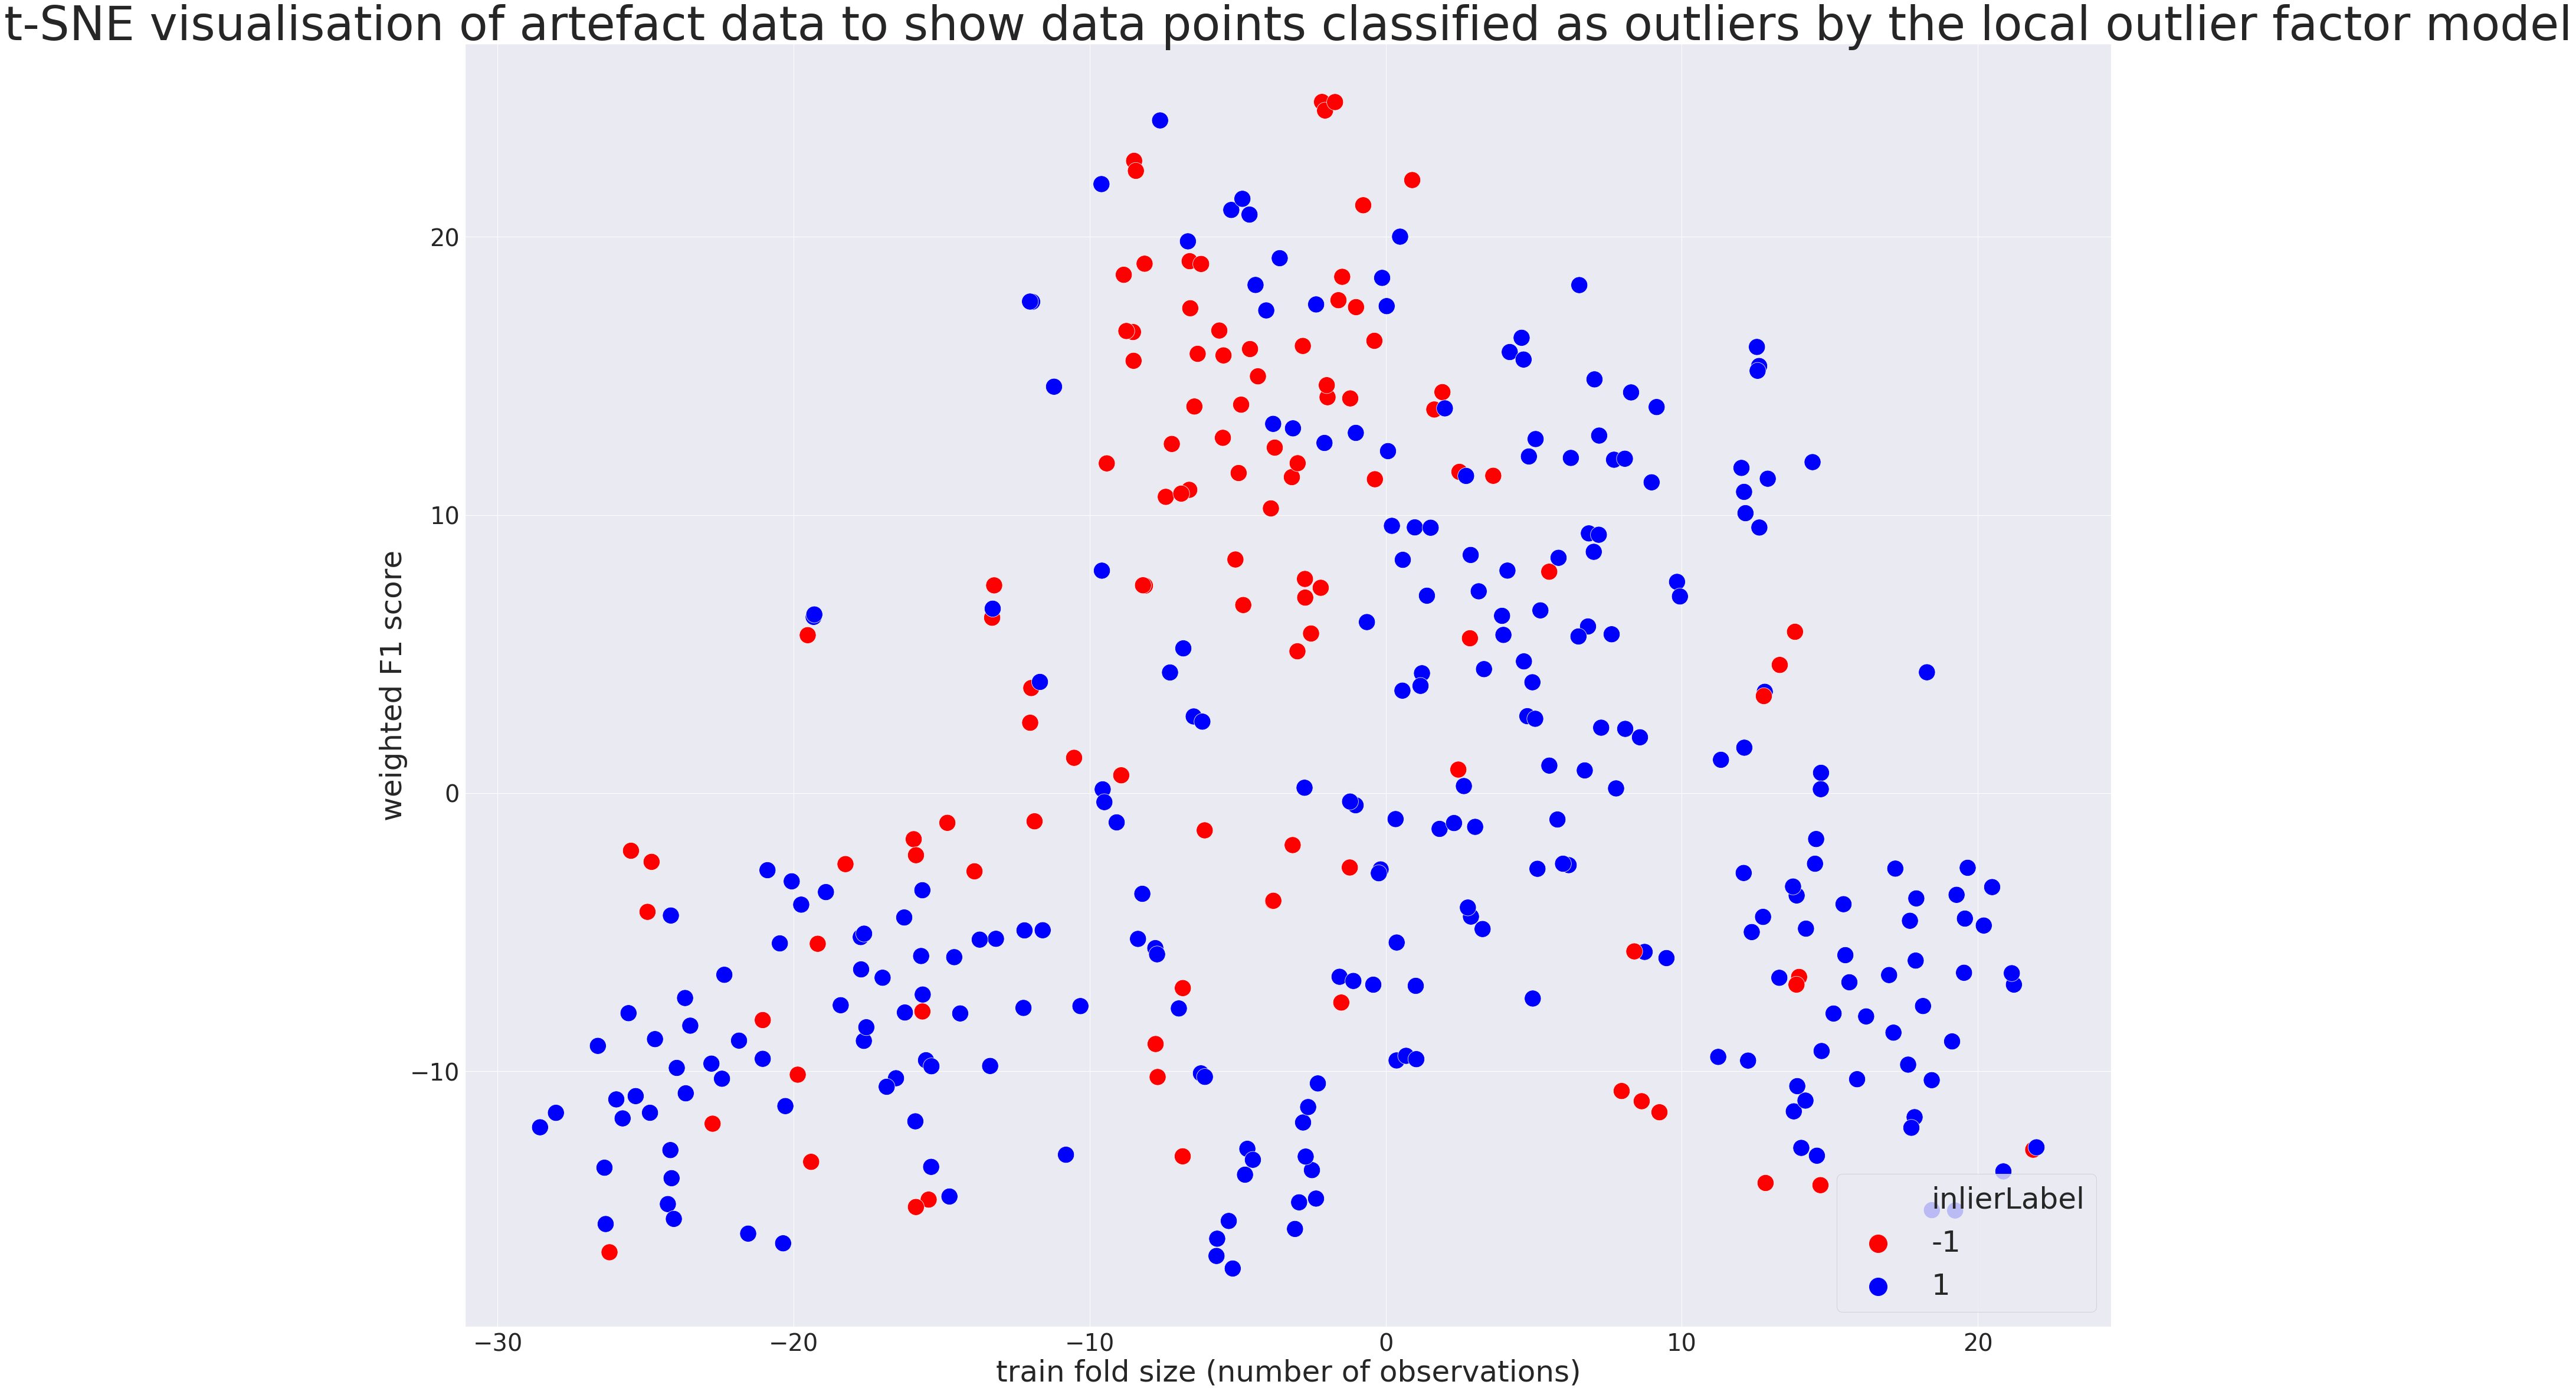

In [12]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.scatterplot(data = tsne_data_with_colour, x = 'tsne1', y = 'tsne2', hue='inlierLabel', s = 800, palette = ['red', 'blue'])
plt.title('test')
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("weighted F1 score",fontsize=50)
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.tick_params(labelsize=40)
plot.set_title('t-SNE visualisation of artefact data to show data points classified as outliers by the local outlier factor model', fontdict = {'fontsize': 80})

plt.legend(fontsize = 50, loc = 4, markerscale = 5)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='figures/2d_tSNE')

In [14]:
tsne_data_with_colour.to_csv('tsne_outlier_data.csv')